In [85]:
import pandas as pd
import numpy as np
import seaborn as sns

In [86]:
p_df = sns.load_dataset('penguins')

In [87]:
p_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


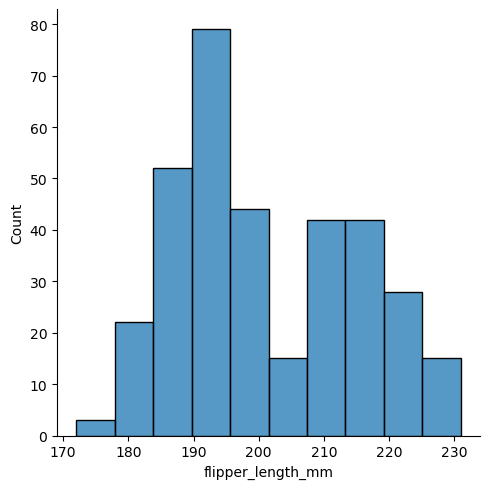

In [88]:
sns.displot(p_df['flipper_length_mm'])

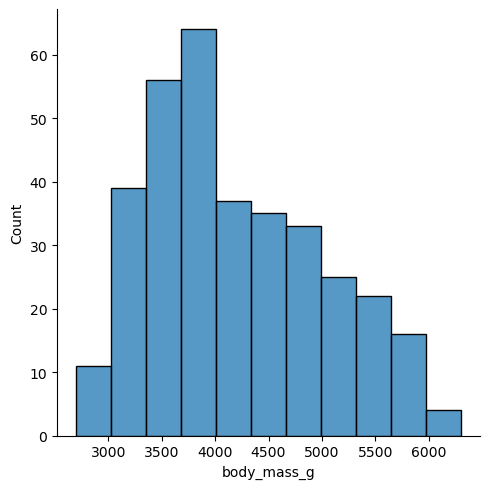

In [89]:
sns.displot(p_df['body_mass_g'])

In [90]:
p_df.dropna(inplace=True)

In [91]:
X = p_df['flipper_length_mm']
y = p_df['body_mass_g']

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [93]:
X_train.shape

(266,)

In [94]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit((np.array(X_train).reshape(-1,1)))
X_train_scaled = scaler.transform(np.array(X_train).reshape(-1,1))


In [95]:
from sklearn.linear_model import LinearRegression


lm = LinearRegression()
model = lm.fit(X_train_scaled,y_train)


In [96]:
model.coef_

array([2974.66093768])

In [97]:
model.intercept_

2752.634161253712

In [98]:
X_test_scaled = scaler.transform(np.array(X_test).reshape(-1,1))

In [99]:
model.predict(X_test_scaled)

array([3055.14205322, 5273.53326098, 3912.24774713, 4063.50169311,
       3760.99380115, 4769.35344104, 5323.95124298, 3912.24774713,
       3811.41178314, 4214.7556391 , 3962.66572912, 4063.50169311,
       4567.68151306, 3811.41178314, 4668.51747705, 3408.06792718,
       3508.90389117, 3760.99380115, 3508.90389117, 4870.18940503,
       3962.66572912, 3660.15783716, 5576.04115295, 4315.59160309,
       3206.39599921, 3559.32187317, 4819.77142303, 4819.77142303,
       3206.39599921, 5626.45913495, 3508.90389117, 5676.87711694,
       4063.50169311, 4265.17362109, 5676.87711694, 4618.09949505,
       3912.24774713, 4567.68151306, 3660.15783716, 3458.48590918,
       3206.39599921, 3660.15783716, 4164.3376571 , 4113.91967511,
       3609.73985516, 3508.90389117, 5223.11527899, 3559.32187317,
       3660.15783716, 5122.279315  , 3760.99380115, 5021.44335101,
       4718.93545904, 3155.97801721, 3710.57581915, 5172.697297  ,
       3256.8139812 , 3912.24774713, 3962.66572912, 4315.59160

In [100]:
y_pred = model.predict(X_test_scaled)

In [101]:
residuals = np.array(y_test - y_pred)

In [103]:
res_df = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred, 'residuals':residuals})

In [104]:
res_df.head()

,y_test,y_pred,residuals
30,3250.0,3055.142053,194.857947
317,4875.0,5273.533261,-398.533261
79,4000.0,3912.247747,87.752253
201,3675.0,4063.501693,-388.501693
63,4050.0,3760.993801,289.006199


In [105]:
from sklearn.metrics import mean_squared_error as mse

mse(y_test,y_pred)

129886.71972544755

In [106]:
rmse = np.sqrt(mse(y_test,y_pred))

In [107]:
rmse

360.398001833317

In [114]:
import matplotlib.pyplot as plt

x = y_test
y = y_pred

plt.show()